# Martingale Doubling System

Another well-known gambling system is the martingale doubling system. Suppose that you are betting on red to turn up in roulette. Every time you win,
bet 1 dollar next time. Every time you lose, double your previous bet. Suppose
that you use this system until you have won at least 5 dollars or you have lost
more than 100 dollars. Write a program to simulate this and play it a number
of times and see how you do. In his book The Newcomes, W. M. Thackeray remarks “You have not played as yet? Do not do so; above all avoid a
martingale if you do.” Was this good advice?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
RED_OR_NOT = (True,False)
RED_PROBABILITY_DIST = (18/38,20/38)
GAME_LENGTH = 100

N_SIMULATIONS = 1000
result_length = np.empty(N_SIMULATIONS)
results = np.empty(N_SIMULATIONS)

Single Game

In [3]:
def single_game():
    
    net_winning = 0
    current_bet = 1
    n_games = 0
    
    while(net_winning < 5 and net_winning >-100 and n_games < GAME_LENGTH):
        is_red = np.random.choice(RED_OR_NOT, size=1, p=RED_PROBABILITY_DIST)

        if is_red:
            net_winning += current_bet
            next_bet = 1
        else:
            net_winning -= current_bet
            next_bet = current_bet*2    
        n_games += 1
    # End While loop
    return n_games , net_winning

Simulation

In [4]:
for i in range(N_SIMULATIONS):
    result_length[i] , results[i] = single_game()

Number of Wins and Lose 

In [5]:
wins = pd.Categorical(results == 5)
wins.value_counts()

False    544
True     456
dtype: int64

Game Length Resulting Win 5$

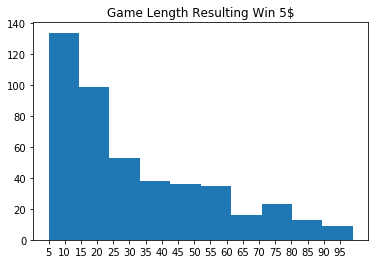

In [6]:
win_length = result_length[results == 5]
_ = plt.hist(win_length)
plt.title('Game Length Resulting Win 5$')
_ = plt.xticks(np.arange(min(win_length), max(win_length)+1, 5))
